# S09 T01: Practicant amb training i test sets
___
Familiarízate con la programación científica mediante la librería SKLearn / Scikitlearn.

In [1]:
#import basic libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import time
from sklearn.model_selection import train_test_split

## Data preprocessing
Antes de iniciar a trabajar con el dataset, se observan y procesan los datos del dataset para poder utilizarlos. 

In [2]:
#import te dataset 
fligths_delay = pd.read_csv('DelayedFlights.csv')

In [3]:
fligths_delay

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


## Data information:
- *Year:* 2008
- *Month:* 1-12
- *DayOfMonth*: 1-31
- *DayOfWeek*: 1 (Monday) - 7 (Sunday)
- *DepTime*: actual departure time (local, hhmm)
- *CRSDepTime*: scheduled departure time (local, hhmm)
- *ArrTime*: actual arrival time (local, hhmm)
- *CRSArrTime*: scheduled arrival time (local, hhmm)
- *UniqueCarrier*: unique carrier code
- *FlightNum*: flight number
- *TailNum*: plane tail number: aircraft registration, unique aircraft identifier
- *ActualElapsedTime*: in minutes
- *CRSElapsedTime*: in minutes
- *AirTime*: in minutes
- *ArrDelay*: arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).
- *DepDelay*: departure delay, in minutes
- *Origin*: origin IATA airport code
- *Dest*: destination IATA airport code
- *Distance*: in miles
- *TaxiIn*: taxi in time, in minutes
- *TaxiOut*: taxi out time in minutes
- *Cancelled*: was the flight cancelled
- *CancellationCode*: reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
- *Diverted* 1 = yes, 0 = no
- *CarrierDelay in minutes*: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
- *WeatherDelay in minutes*: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
- *NASDelay in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.
- *SecurityDelay in minutes*: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
- *LateAircraftDelay in minutes*: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

*https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7

In [4]:
print(fligths_delay.shape)
fligths_delay.describe().transpose()

(1936758, 30)


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1936758.0,3.341651e+06,2.066065e+06,0.0,1517452.5,3242558.0,4972466.75,7009727.0
Year,1936758.0,2.008000e+03,0.000000e+00,2008.0,2008.0,2008.0,2008.00,2008.0
Month,1936758.0,6.111106e+00,3.482546e+00,1.0,3.0,6.0,9.00,12.0
DayofMonth,1936758.0,1.575347e+01,8.776272e+00,1.0,8.0,16.0,23.00,31.0
DayOfWeek,1936758.0,3.984827e+00,1.995966e+00,1.0,2.0,4.0,6.00,7.0
DepTime,1936758.0,1.518534e+03,4.504853e+02,1.0,1203.0,1545.0,1900.00,2400.0
CRSDepTime,1936758.0,1.467473e+03,4.247668e+02,0.0,1135.0,1510.0,1815.00,2359.0
ArrTime,1929648.0,1.610141e+03,5.481781e+02,1.0,1316.0,1715.0,2030.00,2400.0
CRSArrTime,1936758.0,1.634225e+03,4.646347e+02,0.0,1325.0,1705.0,2014.00,2400.0
FlightNum,1936758.0,2.184263e+03,1.944702e+03,1.0,610.0,1543.0,3422.00,9742.0


In [3]:
#delete columns with no important info
fligths_delay = fligths_delay.drop(['Unnamed: 0','TailNum','TaxiIn','TaxiOut'], axis = 1)

___
Es importante saber que tipos de datos tenemos para poder analizarlos, por lo que la primera parte del data preprocessing se enfocara en ello. 

<br>

Existen tres tipos de datos:
- Numérico
- Categórico
- Ordinal

In [6]:
fligths_delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 26 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  ActualElapsedTime  float64
 11  CRSElapsedTime     float64
 12  AirTime            float64
 13  ArrDelay           float64
 14  DepDelay           float64
 15  Origin             object 
 16  Dest               object 
 17  Distance           int64  
 18  Cancelled          int64  
 19  CancellationCode   object 
 20  Diverted           int64  
 21  CarrierDelay       float64
 22  WeatherDelay       float64
 23  NASDelay           float64
 24  SecurityDelay      float64
 25  LateAircraftDelay 

In [4]:
db_delay = fligths_delay.copy()

Se puede observar que algunas variables categoricas estan identificadas con el tipo *'object'*, por lo que se va a cambiar el tipo de dato a categorico para facilitar su procesamiento.

In [5]:
db_delay = db_delay.astype({
    'DepTime': pd.Int64Dtype(),
    'ArrTime': pd.Int64Dtype(),
    'ActualElapsedTime': pd.Int64Dtype(),
    'CRSElapsedTime': pd.Int64Dtype(),
    'AirTime': pd.Int64Dtype(),
    'ArrDelay': pd.Int64Dtype(),
    'DepDelay': pd.Int64Dtype(),
    'CarrierDelay': pd.Int64Dtype(),
    'WeatherDelay': pd.Int64Dtype(),
    'NASDelay': pd.Int64Dtype(),
    'SecurityDelay': pd.Int64Dtype(),
    'LateAircraftDelay': pd.Int64Dtype(),
    
})

In [6]:
db_delay[['UniqueCarrier','Origin','Dest']] =db_delay[['UniqueCarrier','Origin','Dest']].astype('category')

Tambien se puede observar que algunos atributos estan identificados como variables numericas. Sin embargo, estos datos son ordinales, por ejemplo: el numero de vuelo, el numero en el avion y el codigo de cancelacion ('FlightNum', 'TailNum', 'CancellationCode') y alguno corresponden al tipo 'boolean', como 'Diverted' y 'Cancelled'. Por lo que tambien seran procesadas para cambiar su dtype. 

In [7]:
#data to boolean
db_delay["Diverted"]=db_delay["Diverted"].astype('bool')
db_delay["Cancelled"]=db_delay["Cancelled"].astype('bool')

In [8]:
#numeric data to categorical
db_delay['CancellationCode']= db_delay['CancellationCode'].replace({"A" : "carrier", "B" : "weather", "C" : "NAS", "D" : "security", "N" : "none" })
db_delay['CancellationCode']=db_delay['CancellationCode'].astype('category')
db_delay['FlightNum'] = db_delay['FlightNum'].astype('category')


In [9]:
db_delay['CancellationCode'].value_counts()

none       1936125
weather        307
carrier        246
NAS             80
Name: CancellationCode, dtype: int64

Ahora, procesamos las columnas que se refieren a la fecha del vuelo, donde se han convinado en una nueva columna de fecha los dias, mes y año del vuelo; y en la columna de dia de la semana se han reemplazado los dias en numero por el nombre del dia.

In [10]:
# Convert 'Year', 'Month' and 'DayofMonth' columns to 'Date'
date = db_delay.rename(columns={'DayofMonth':'Day'}) # change the name of the colum 
date = date[['Year','Month','Day']] # Create a small dataset only with the important columns for the date
db_delay['FlightDate_USA'] = pd.to_datetime(date)

db_delay['DayOfWeek']= db_delay['DayOfWeek'].replace({"1" : "Monday", "2" : "Tuesday", "3" : "Wednesday", "4" : "Thursday", "5" : "Friday",'6' : 'Saturday', '7' :'Sunday'})
db_delay['DayOfWeek']=db_delay['DayOfWeek'].astype('category')

db_delay.drop(columns=['Year','Month','DayofMonth'], inplace=True)

In [14]:
db_delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 24 columns):
 #   Column             Dtype         
---  ------             -----         
 0   DayOfWeek          category      
 1   DepTime            Int64         
 2   CRSDepTime         int64         
 3   ArrTime            Int64         
 4   CRSArrTime         int64         
 5   UniqueCarrier      category      
 6   FlightNum          category      
 7   ActualElapsedTime  Int64         
 8   CRSElapsedTime     Int64         
 9   AirTime            Int64         
 10  ArrDelay           Int64         
 11  DepDelay           Int64         
 12  Origin             category      
 13  Dest               category      
 14  Distance           int64         
 15  Cancelled          bool          
 16  CancellationCode   category      
 17  Diverted           bool          
 18  CarrierDelay       Int64         
 19  WeatherDelay       Int64         
 20  NASDelay           Int64

In [15]:
db_delay.isnull().sum()

DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
FlightDate_USA            0
dtype: int64

In [16]:
db_delay.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DepTime,1936758.0,1518.534117,450.485255,1.0,1203.0,1545.0,1900.0,2400.0
CRSDepTime,1936758.0,1467.472644,424.766800,0.0,1135.0,1510.0,1815.0,2359.0
ArrTime,1929648.0,1610.140629,548.178143,1.0,1316.0,1715.0,2030.0,2400.0
CRSArrTime,1936758.0,1634.224641,464.634712,0.0,1325.0,1705.0,2014.0,2400.0
ActualElapsedTime,1928371.0,133.305863,72.060069,14.0,80.0,116.0,165.0,1114.0
CRSElapsedTime,1936560.0,134.302744,71.341439,-25.0,82.0,116.0,165.0,660.0
AirTime,1928371.0,108.277147,68.642610,0.0,58.0,90.0,137.0,1091.0
ArrDelay,1928371.0,42.199885,56.784715,-109.0,9.0,24.0,56.0,2461.0
DepDelay,1936758.0,43.185176,53.402502,6.0,12.0,24.0,53.0,2467.0
Distance,1936758.0,765.686159,574.479653,11.0,338.0,606.0,998.0,4962.0


## Nivel 1
### - Ejercicio 1
Parte el conjunto de  datos DelayedFlights.csv  train y test. Estudia ambos conjuntos por separado, a nivel descriptivo.
> Se selecciona el porcentaje de division para el train y test, entre los porcentajes mas comunes se incluyen:
> - Train: 80%, Test: 20%
> - Train: 67%, Test: 33%
> - Train: 50%, Test: 50%

Para este analisis se utilizara la relacion 80-20.

In [22]:
# Train and split function
train, test = train_test_split(db_delay, train_size= 0.8, random_state=1)

In [23]:
train_d = round(train.describe(),2)
train_d

,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1549406.00,1549406.00,1543751.00,1549406.00,1542731.00,1549248.00,1542731.00,1542731.00,1549406.00,1549406.00,998077.00,998077.00,998077.00,998077.00,998077.00
mean,1518.45,1467.41,1609.81,1634.03,133.32,134.30,108.28,42.20,43.17,765.67,19.16,3.71,15.03,0.09,25.30
std,450.55,424.80,548.45,464.88,72.05,71.32,68.63,56.74,53.35,574.31,43.46,21.54,33.87,2.03,41.96
min,1.00,0.00,1.00,0.00,14.00,-25.00,0.00,-109.00,6.00,11.00,0.00,0.00,0.00,0.00,0.00
25%,1203.00,1135.00,1316.00,1325.00,80.00,82.00,58.00,9.00,12.00,338.00,0.00,0.00,0.00,0.00,0.00
50%,1545.00,1510.00,1715.00,1705.00,116.00,116.00,90.00,24.00,24.00,606.00,2.00,0.00,2.00,0.00,8.00
75%,1900.00,1815.00,2030.00,2014.00,165.00,165.00,137.00,56.00,53.00,998.00,21.00,0.00,15.00,0.00,33.00
max,2400.00,2359.00,2400.00,2400.00,776.00,660.00,664.00,2461.00,2467.00,4962.00,2436.00,1352.00,1357.00,392.00,1254.00


In [24]:
test_d = round(test.describe(),2)
test_d

,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,387352.00,387352.00,385897.00,387352.00,385640.00,387312.00,385640.00,385640.00,387352.00,387352.00,249411.00,249411.00,249411.00,249411.00,249411.00
mean,1518.85,1467.73,1611.45,1635.02,133.26,134.32,108.27,42.19,43.23,765.74,19.25,3.67,14.99,0.09,25.27
std,450.24,424.62,547.08,463.67,72.09,71.42,68.71,56.96,53.60,575.15,43.89,21.31,33.68,1.98,42.43
min,1.00,1.00,1.00,0.00,17.00,-21.00,2.00,-68.00,6.00,24.00,0.00,0.00,0.00,0.00,0.00
25%,1204.00,1135.00,1317.00,1325.00,80.00,82.00,58.00,9.00,12.00,338.00,0.00,0.00,0.00,0.00,0.00
50%,1546.00,1510.00,1716.00,1706.00,116.00,116.00,90.00,24.00,24.00,606.00,2.00,0.00,1.00,0.00,8.00
75%,1900.00,1815.00,2031.00,2015.00,165.00,165.00,137.00,56.00,53.00,998.00,21.00,0.00,14.00,0.00,33.00
max,2400.00,2359.00,2400.00,2400.00,1114.00,660.00,1091.00,1951.00,1952.00,4962.00,1951.00,1070.00,768.00,229.00,1316.00


In [25]:
print('Training dataset: ', round(len(train)/len(db_delay),2), ' y tiene un shape de: ', train.shape)
print('Test dataset: ', round(len(test)/len(db_delay),2), ' y tiene un shape de: ', test.shape)

Training dataset:  0.8  y tiene un shape de:  (1549406, 24)
Test dataset:  0.2  y tiene un shape de:  (387352, 24)


In [26]:
diff_desc = train_d - test_d
diff_desc.transpose()

,count,mean,std,min,25%,50%,75%,max
DepTime,1162054.0,-0.40,0.31,0.0,-1.0,-1.0,0.0,0.0
CRSDepTime,1162054.0,-0.32,0.18,-1.0,0.0,0.0,0.0,0.0
ArrTime,1157854.0,-1.64,1.37,0.0,-1.0,-1.0,-1.0,0.0
CRSArrTime,1162054.0,-0.99,1.21,0.0,0.0,-1.0,-1.0,0.0
ActualElapsedTime,1157091.0,0.06,-0.04,-3.0,0.0,0.0,0.0,-338.0
CRSElapsedTime,1161936.0,-0.02,-0.10,-4.0,0.0,0.0,0.0,0.0
AirTime,1157091.0,0.01,-0.08,-2.0,0.0,0.0,0.0,-427.0
ArrDelay,1157091.0,0.01,-0.22,-41.0,0.0,0.0,0.0,510.0
DepDelay,1162054.0,-0.06,-0.25,0.0,0.0,0.0,0.0,515.0
Distance,1162054.0,-0.07,-0.84,-13.0,0.0,0.0,0.0,0.0


Se puede observar que la diferencia entre la media y la desviacion estandar no es muy grande entre el train y el test dataset. Sin embargo, se observa gran diferencia entre el 'max' debido posiblemente a la existencia de valores 'outliers'.

### Categorical variables
Ahora analizamos los datos por tipo de variables, iniciando con el analisis de las variables categoricas

In [11]:
#select categorical from the dataset
at_cat = db_delay.select_dtypes(include=['category']).columns
at_cat = at_cat.drop(labels='DayOfWeek')
#separate in each dataset
cat_data = db_delay[at_cat]
cat_train= train[at_cat]
cat_test= test[at_cat]

NameError: name 'train' is not defined

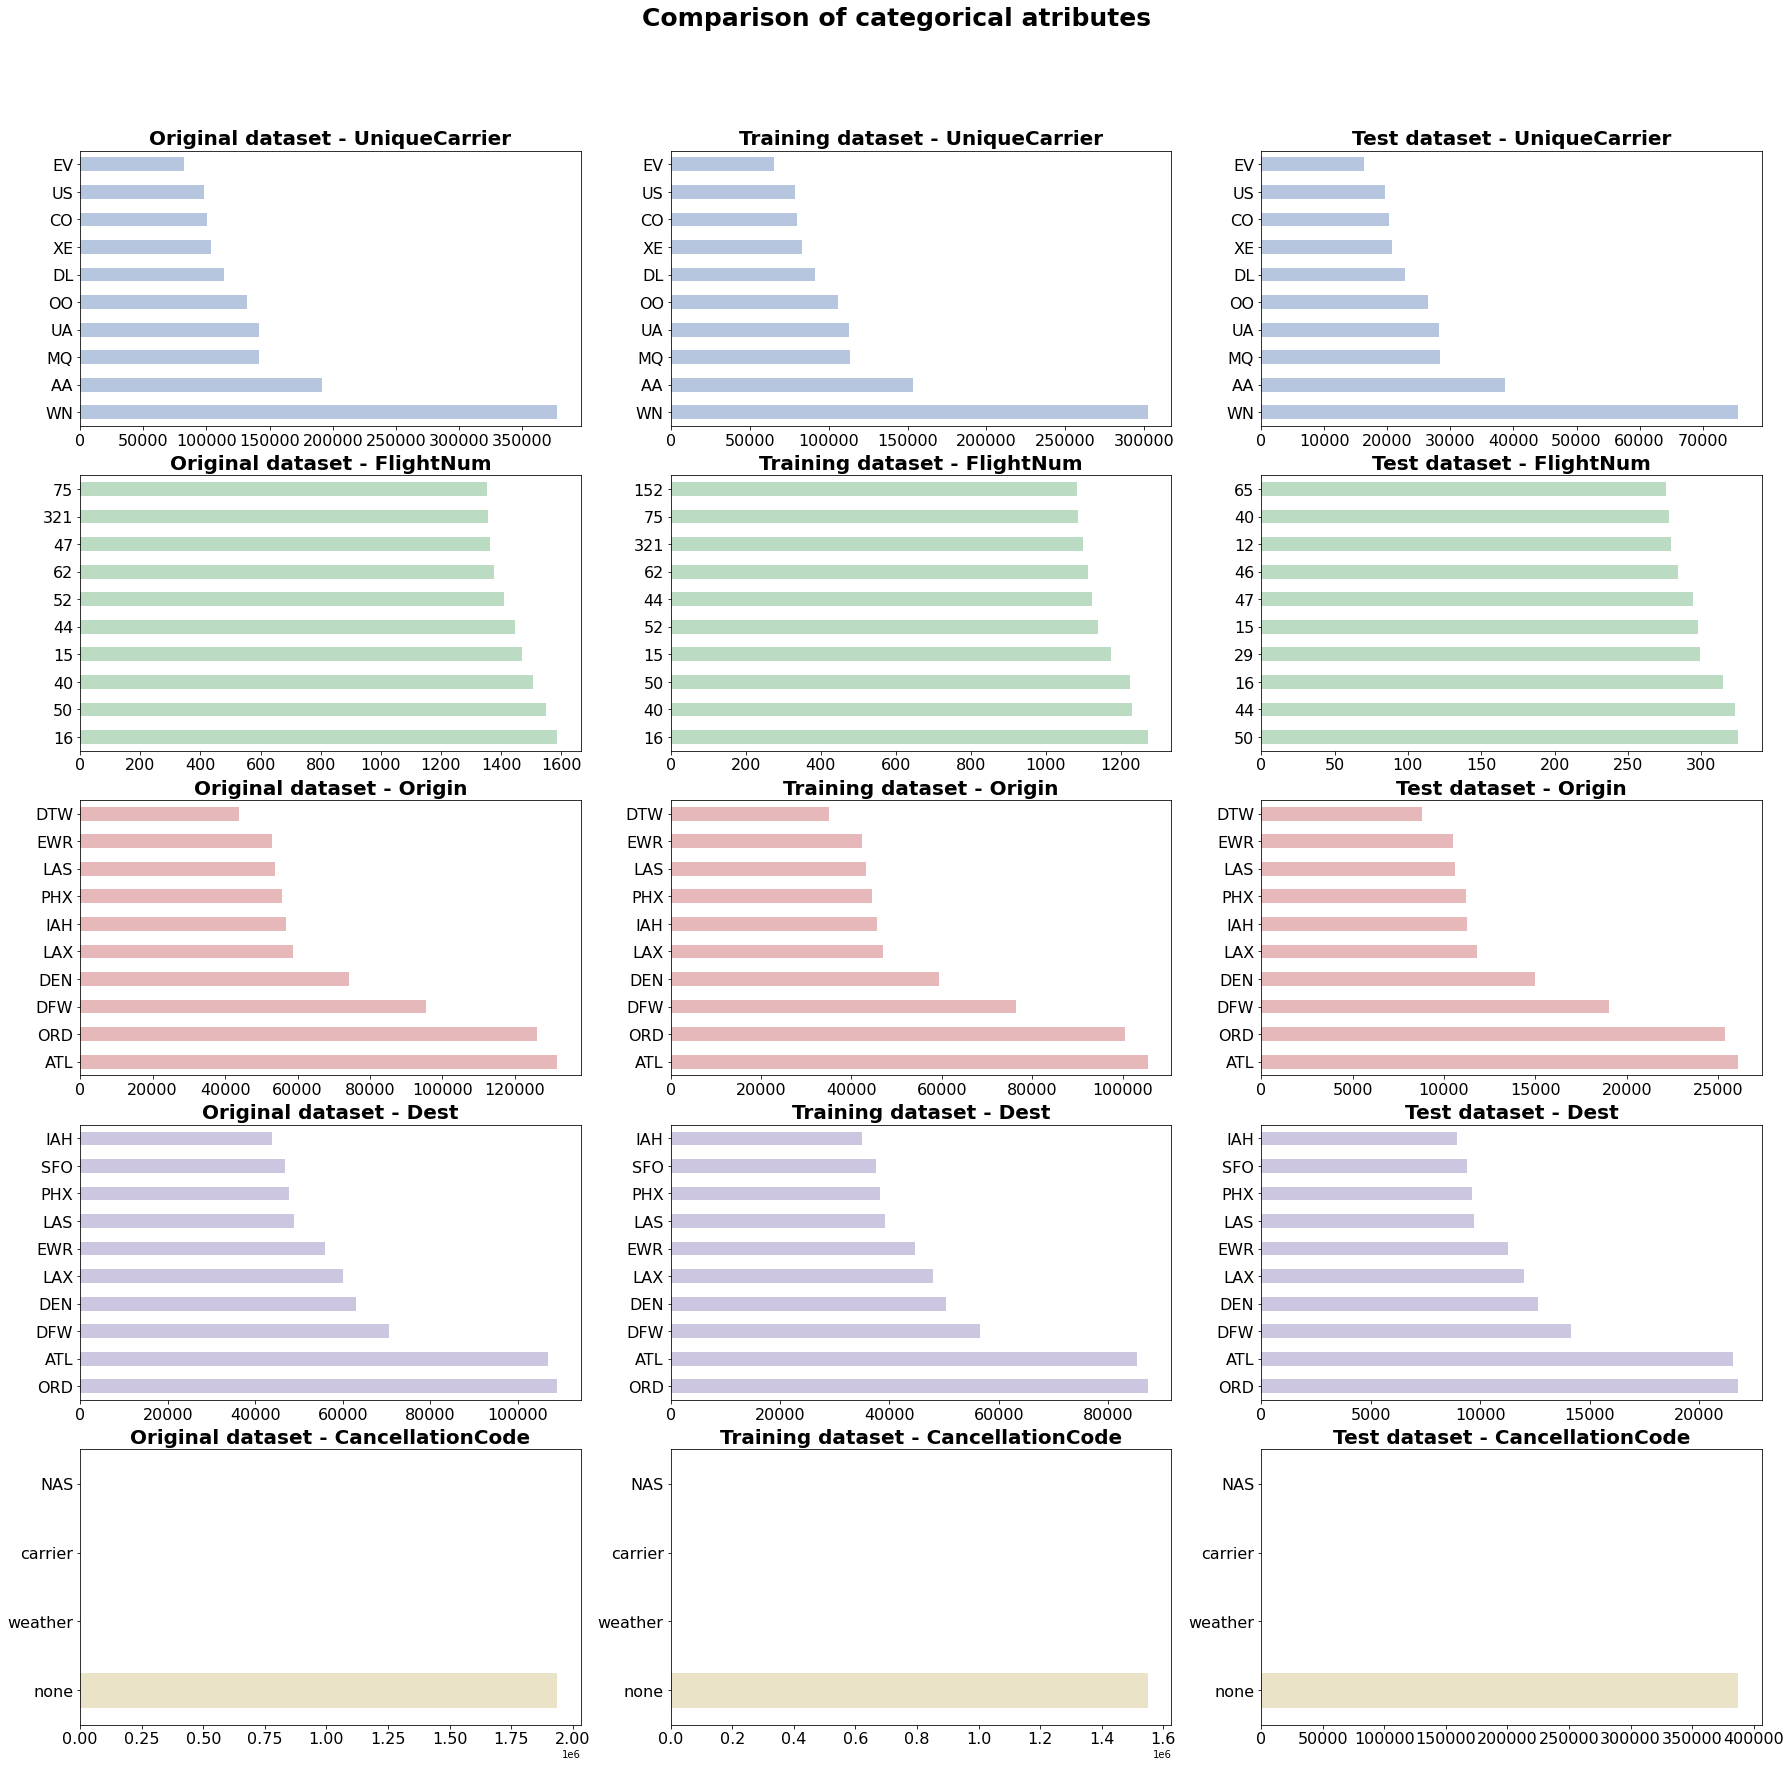

In [74]:
fig, ax = plt.subplots(ncols=len([db_delay, train, test]), nrows=len(cat_data.columns), figsize = (25,25))
for i, datasets in enumerate([db_delay, train, test]):
    title = "Original dataset - " if datasets is db_delay else "Training dataset - " if datasets is train else "Test dataset - " 
    
    for j, column in enumerate(cat_data):
        color = (list(plt.rcParams['axes.prop_cycle'])*3)[j]["color"]
        datasets[column].value_counts().sort_values(ascending = False).head(10).plot.barh(color = color, ax = ax[j][i], alpha = 0.4)
        ax[j][i].set_title(title + column, fontsize = 20, fontweight = 'bold')
        ax[j][i].tick_params(labelsize = 16)
        ax[j][i].set_xlabel('')

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Comparison of categorical atributes', fontsize = 25, fontweight = 'bold')
plt.show()

De los graficos anteriores se puede observar que los sub-datasets en los que se ha dividido el dataset original mantienen una distribucion similar en las variables categoricas.
___
### Boolean variables (ordinal)
Ahora se va a comparar las variables que tienen datos 'boolean'.

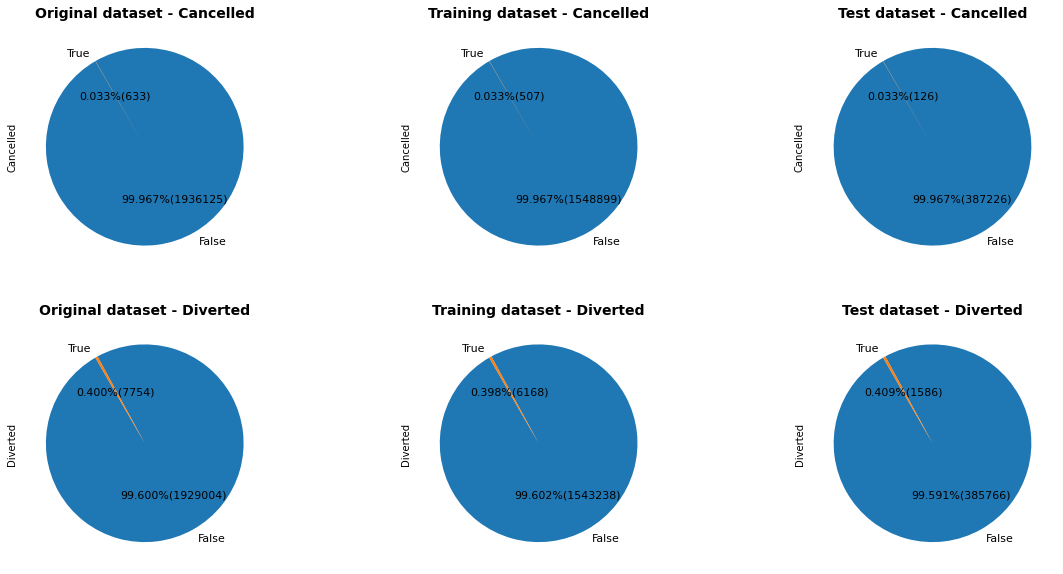

In [88]:
#separate columns with boolean dtype into a variable
booleans = db_delay.select_dtypes(include=['bool']).columns
booleans_var = db_delay[booleans]

# create a figure with subplots
fig, ax = plt.subplots(ncols=len([db_delay, train, test]),nrows=len(booleans_var.columns), figsize = (20,10))

#loop for adding subtitles and create the pie plot
for i, datasets in enumerate([db_delay, train, test]):
    title = "Original dataset - " if datasets is db_delay else "Training dataset - " if datasets is train else "Test dataset - "  
    for j, column in enumerate(booleans_var):
        datasets[column].value_counts().plot.pie( autopct=lambda p:'{:.3f}%({:.0f})'.format(p,(p/100)*len(datasets[column])), startangle = 120,ax = ax[j][i],textprops={'fontsize': 11})
        ax[j][i].set_title(title + column, fontsize = 14, fontweight = 'bold')
    
plt.show()
       

Del grafico anterior se puede observar que el training y test datasets mantienen una relacion similar en los atributos, pues cuentan con porcentajes similares de los tipos de observaciones (true-false).
___
### Numerical Variables
Ahora, se va a hacer el analisis exploratorio de las variables numericas.

In [12]:
numeric = db_delay.select_dtypes(include=['int64']).columns
numeric_var = db_delay[numeric]

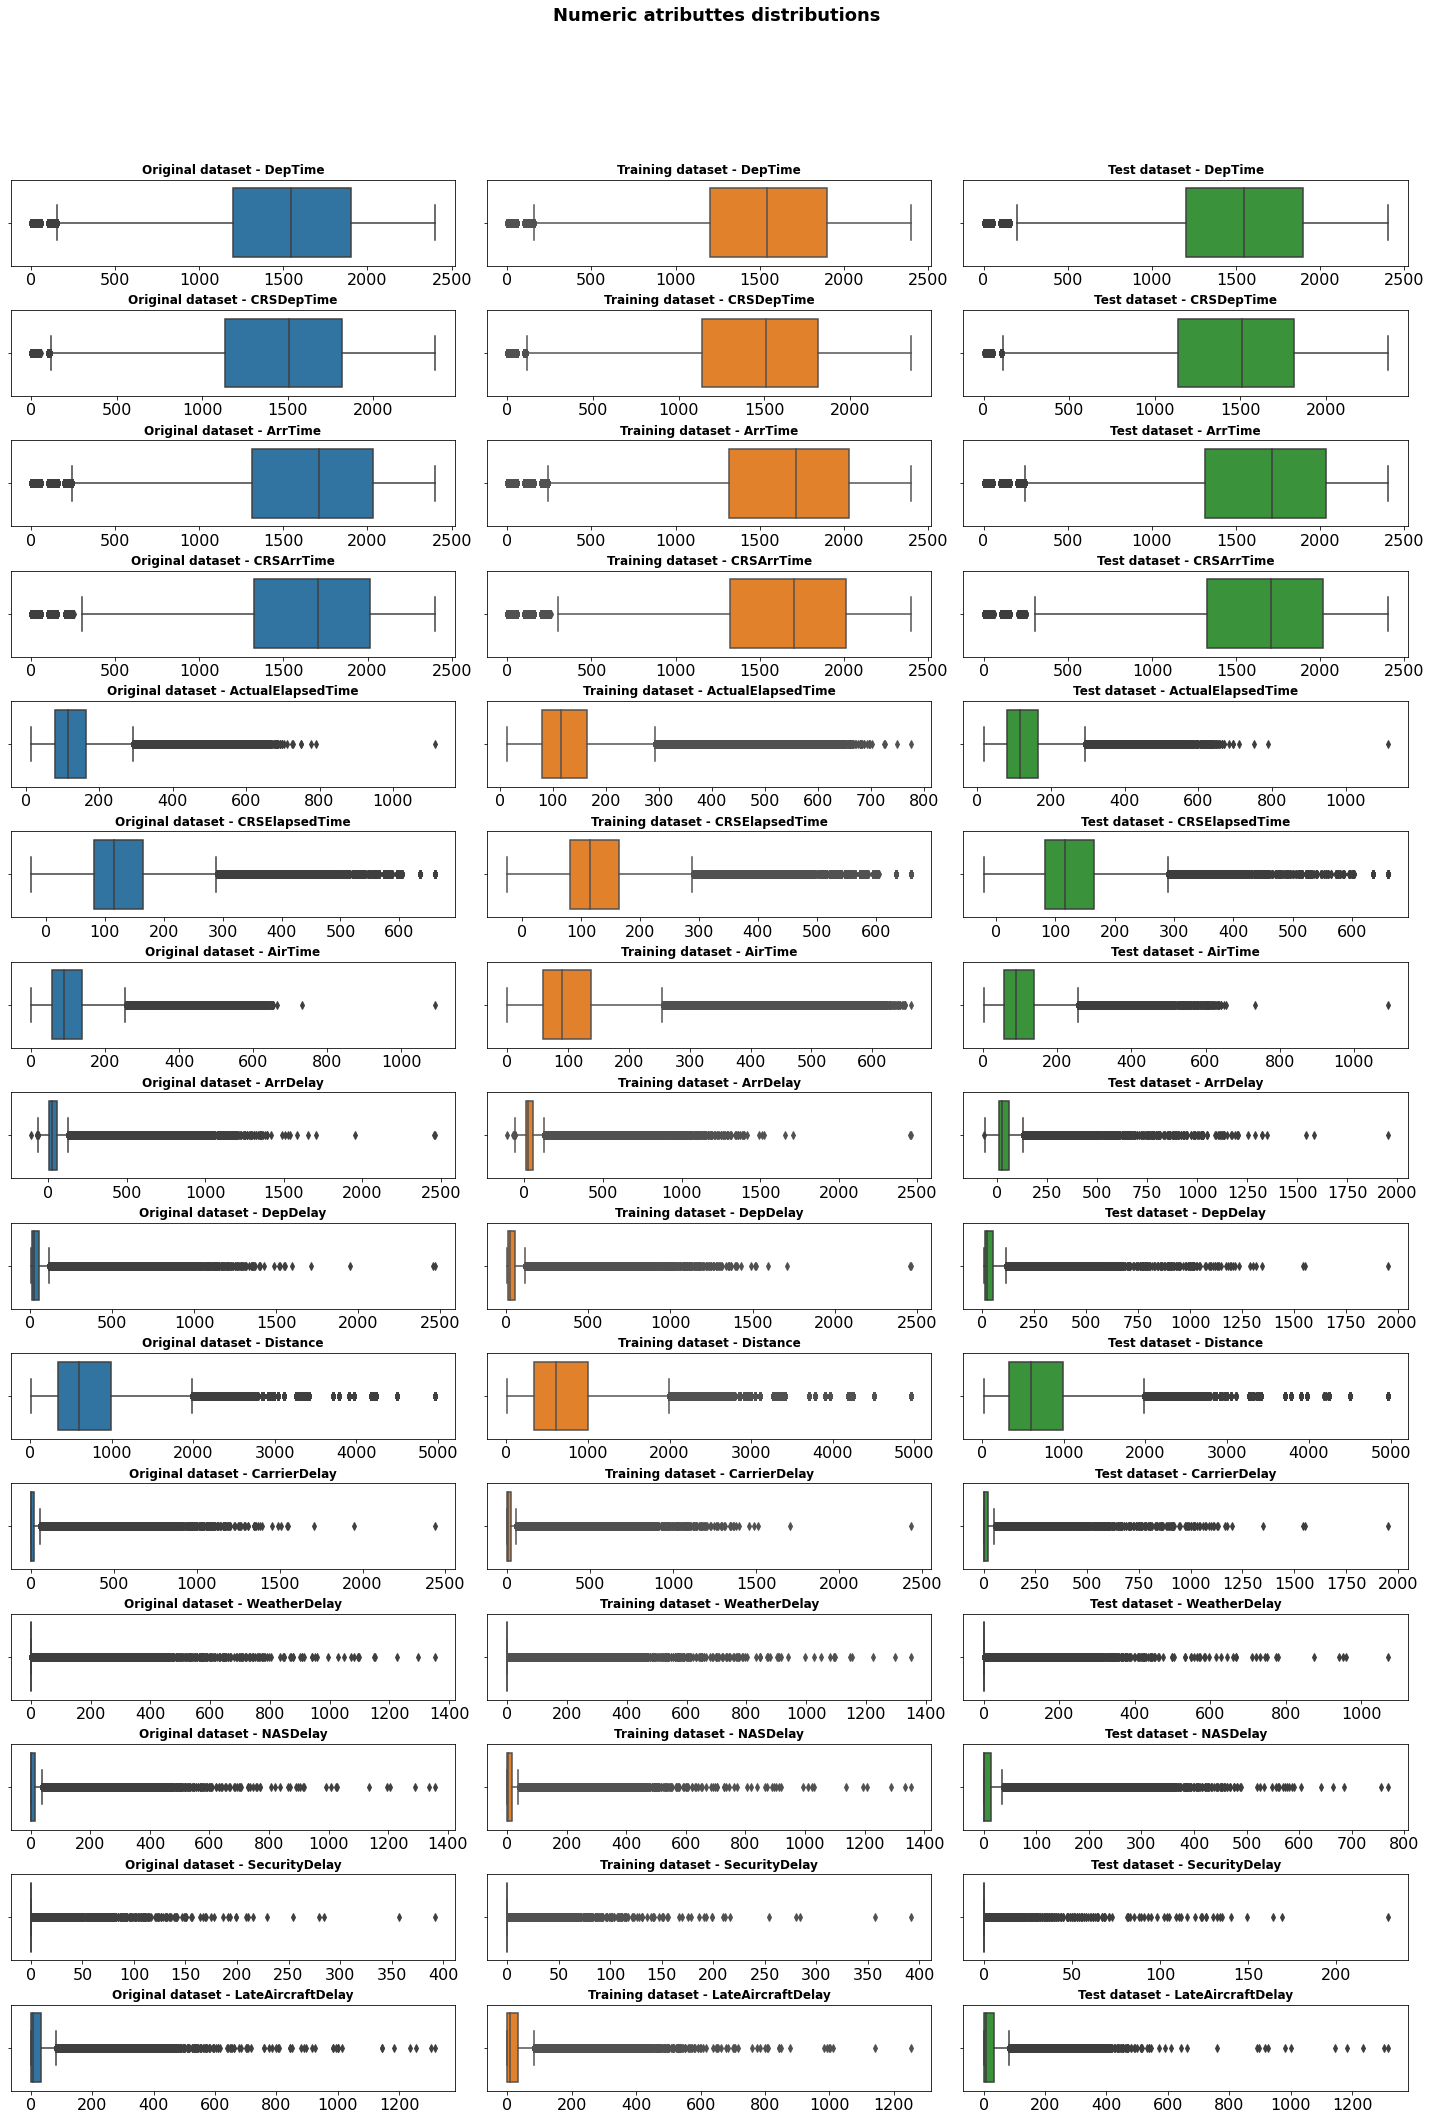

In [122]:
# Numerical Distributions in boxplot
fig, ax = plt.subplots(ncols=len([db_delay, train, test]), nrows=len(numeric_var.columns), figsize = (20,30))

for i, datasets in enumerate([db_delay, train, test]):
    title = "Original dataset - " if datasets is db_delay else "Training dataset - " if datasets is train else "Test dataset - "  
   
    for j, column in enumerate(numeric_var):
        sns.boxplot(
            data = datasets,
            x = column,
            color= (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
            ax = ax[j][i]
        )
        ax[j][i].set_title(title + column, fontsize = 12, fontweight = 'bold')
        ax[j][i].tick_params(labelsize = 16)
        ax[j][i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Numeric atributtes distributions', fontsize = 18, fontweight = 'bold')
plt.show()

Ahora observamos la distribucion de los datos numericos, se puede observar que en los tres dataset (original, training y test) se tiene una distribucion muy similar en los datos.

<br>

**Resumen**
<br>
En general, entre todos los tipos de variables que se tienen en el dataset, se puede observar que la segmentacion en test y training dataset recoge informacion con una distribucion similar en todos los casos.

## Nivel 2
### - Ejercicio 2
Aplica algún proceso de transformación (estandarizar los datos numéricos, crear columnas dummies, polinomios...).

#### Data Engineering Etapas:
- Handling missing data (impute)
- Creation of dummies
- Standarization counting outliers (Scaling)

<br>

*https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114*
___

Primero observamos el porcentaje de datos faltantes en el dataset:

In [13]:
round(db_delay[:].isnull().sum() * 100 / db_delay.shape[0], 2)

DayOfWeek             0.00
DepTime               0.00
CRSDepTime            0.00
ArrTime               0.37
CRSArrTime            0.00
UniqueCarrier         0.00
FlightNum             0.00
ActualElapsedTime     0.43
CRSElapsedTime        0.01
AirTime               0.43
ArrDelay              0.43
DepDelay              0.00
Origin                0.00
Dest                  0.00
Distance              0.00
Cancelled             0.00
CancellationCode      0.00
Diverted              0.00
CarrierDelay         35.59
WeatherDelay         35.59
NASDelay             35.59
SecurityDelay        35.59
LateAircraftDelay    35.59
FlightDate_USA        0.00
dtype: float64

Ahora, se procede a eliminar las columnas que tengan un porcentaje alto en datos faltantes y se procede a rellenar los atributos que tienen menos variables faltantes. Para este caso se ha realizado un fill: 0, debido a que la falta de datos puede deberse a que no hubo retraso en el vuelo.

In [14]:
# Eliminate remaining missing values
db_delay[numeric] = db_delay[numeric].fillna(0)

#drop columns with higher missing values
db_delay.drop(columns=['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], inplace=True)


In [15]:
#drop boolean atributes
db_delay.drop(columns=['Cancelled','Diverted','DayOfWeek'], inplace=True)

In [16]:
db_delay.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DepTime,1936758.0,1518.534117,450.485255,1.0,1203.0,1545.0,1900.0,2400.0
CRSDepTime,1936758.0,1467.472644,424.766800,0.0,1135.0,1510.0,1815.0,2359.0
ArrTime,1936758.0,1604.229668,555.768531,0.0,1313.0,1714.0,2030.0,2400.0
CRSArrTime,1936758.0,1634.224641,464.634712,0.0,1325.0,1705.0,2014.0,2400.0
ActualElapsedTime,1936758.0,132.728591,72.434713,0.0,80.0,116.0,165.0,1114.0
CRSElapsedTime,1936758.0,134.289014,71.350714,-25.0,82.0,116.0,165.0,660.0
AirTime,1936758.0,107.808261,68.861845,0.0,58.0,90.0,137.0,1091.0
ArrDelay,1936758.0,42.017141,56.729346,-109.0,9.0,24.0,55.0,2461.0
DepDelay,1936758.0,43.185176,53.402502,6.0,12.0,24.0,53.0,2467.0
Distance,1936758.0,765.686159,574.479653,11.0,338.0,606.0,998.0,4962.0


Centramos la atencion en la variable categorica UniqueCarrier:

In [30]:
dummies = pd.get_dummies(db_delay.UniqueCarrier)
dummies.head()

,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [22]:
#import standardscaler
from sklearn.preprocessing import StandardScaler
#separate numeric variables
numeric_sd = db_delay.select_dtypes(include=['int64']).columns
db_std = db_delay[numeric_sd].copy()

#apply the standarization to numeric features
db_std= pd.DataFrame(StandardScaler().fit_transform(db_std.values))
db_std.columns = db_delay[numeric_sd].columns
db_std

,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance
0,1.075431,1.147753,1.091768,1.271484,-0.065281,0.220194,0.118959,-0.987446,-0.658868,0.077137
1,-1.697135,-1.724412,-1.083598,-1.364997,-0.065281,0.150117,0.075394,-0.705405,-0.452885,0.077137
2,-1.976834,-1.995149,-1.439862,-1.903054,-0.507058,-0.620723,-0.461914,-0.493874,-0.658868,-0.436371
3,0.689181,0.676907,0.638342,0.625815,-0.589891,-0.620723,-0.447392,-0.141323,-0.171999,-0.436371
4,0.935582,1.053584,0.929830,1.023977,-0.438030,-0.270341,-0.302174,-0.546757,-0.340531,-0.135229
...,...,...,...,...,...,...,...,...,...,...
1936753,-0.596100,-0.582608,0.022978,-0.176966,0.197024,0.248224,0.177046,-0.299971,-0.246902,0.244245
1936754,-1.912458,-2.042233,-1.259931,-1.905206,-0.079086,-0.354433,-0.432871,0.581408,0.258693,-0.495555
1936755,-1.135518,-1.460738,-0.819100,-1.343474,0.404108,0.122087,0.206090,1.004469,0.689384,-0.133488
1936756,-0.593880,-0.535524,-0.284704,-0.424473,-0.244753,-0.242310,-0.273130,-0.582012,-0.602691,-0.405038


In [23]:
db_std.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
DepTime,1936758.0,0.0,1.0,-3.37,-0.70,0.06,0.85,1.96
CRSDepTime,1936758.0,-0.0,1.0,-3.45,-0.78,0.10,0.82,2.10
ArrTime,1936758.0,-0.0,1.0,-2.89,-0.52,0.20,0.77,1.43
CRSArrTime,1936758.0,0.0,1.0,-3.52,-0.67,0.15,0.82,1.65
ActualElapsedTime,1936758.0,-0.0,1.0,-1.83,-0.73,-0.23,0.45,13.55
CRSElapsedTime,1936758.0,-0.0,1.0,-2.23,-0.73,-0.26,0.43,7.37
AirTime,1936758.0,0.0,1.0,-1.57,-0.72,-0.26,0.42,14.28
ArrDelay,1936758.0,-0.0,1.0,-2.66,-0.58,-0.32,0.23,42.64
DepDelay,1936758.0,-0.0,1.0,-0.70,-0.58,-0.36,0.18,45.39
Distance,1936758.0,0.0,1.0,-1.31,-0.74,-0.28,0.40,7.30


## Nivel 3
### - Ejercicio 3
Resume las nuevas columnas generadas de forma estadística y gráfica

In [61]:
#concatenate the dummy and standirized variables
fd_delayed = pd.concat([dummies, db_std], axis = 1)
fd_delayed.head()

,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,...,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance
0,0,0,0,0,0,0,0,0,0,0,...,1.075431,1.147753,1.091768,1.271484,-0.065281,0.220194,0.118959,-0.987446,-0.658868,0.077137
1,0,0,0,0,0,0,0,0,0,0,...,-1.697135,-1.724412,-1.083598,-1.364997,-0.065281,0.150117,0.075394,-0.705405,-0.452885,0.077137
2,0,0,0,0,0,0,0,0,0,0,...,-1.976834,-1.995149,-1.439862,-1.903054,-0.507058,-0.620723,-0.461914,-0.493874,-0.658868,-0.436371
3,0,0,0,0,0,0,0,0,0,0,...,0.689181,0.676907,0.638342,0.625815,-0.589891,-0.620723,-0.447392,-0.141323,-0.171999,-0.436371
4,0,0,0,0,0,0,0,0,0,0,...,0.935582,1.053584,0.929830,1.023977,-0.438030,-0.270341,-0.302174,-0.546757,-0.340531,-0.135229


In [62]:
fd_delayed.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
9E,1936758.0,2.678961e-02,0.161468,0.000000,0.000000,0.000000,0.000000,1.000000
AA,1936758.0,9.906504e-02,0.298749,0.000000,0.000000,0.000000,0.000000,1.000000
AQ,1936758.0,3.872451e-04,0.019675,0.000000,0.000000,0.000000,0.000000,1.000000
AS,1936758.0,2.028803e-02,0.140984,0.000000,0.000000,0.000000,0.000000,1.000000
B6,1936758.0,2.856062e-02,0.166568,0.000000,0.000000,0.000000,0.000000,1.000000
CO,1936758.0,5.173336e-02,0.221488,0.000000,0.000000,0.000000,0.000000,1.000000
DL,1936758.0,5.898414e-02,0.235595,0.000000,0.000000,0.000000,0.000000,1.000000
EV,1936758.0,4.227529e-02,0.201217,0.000000,0.000000,0.000000,0.000000,1.000000
F9,1936758.0,1.459604e-02,0.119929,0.000000,0.000000,0.000000,0.000000,1.000000
FL,1936758.0,3.680584e-02,0.188285,0.000000,0.000000,0.000000,0.000000,1.000000


Para hacer mas sencillo el procesamineto de los datos se toma una muestra aleatoria simple del dataset:

In [59]:
dataset_size= fd_delayed['DepTime'].size + 1

#we create a function to calculate the sample size
def sample_size(N, e):
    n=N/(1+N*e**2)
    return round(n)

#Call of the sample function
size = sample_size(dataset_size,0.05) 
print('la muestra requerida para el conjunto de datos es:',size)

la muestra requerida para el conjunto de datos es: 400


In [38]:
samplind_fligths = fd_delayed.sample(size)
samplind_fligths

,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,...,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance
1449712,0,0,0,0,0,0,0,0,0,0,...,-0.169893,-0.078802,-0.007610,-0.168357,-0.755558,-0.732845,-0.665220,-0.670150,-0.658868,-0.660922
1655139,0,0,0,0,0,0,0,0,0,0,...,0.462759,0.594508,0.438619,0.470855,0.114191,0.262240,0.089915,-0.828798,-0.677593,-0.006417
378797,0,0,0,0,0,0,0,0,0,0,...,-0.809203,-0.806261,-0.475431,-0.676283,-0.369003,-0.270341,-0.200521,-0.388109,-0.265628,-0.340632
832573,0,0,0,0,0,0,0,0,0,0,...,-1.126639,-1.335963,-0.678753,-1.494130,0.045164,-1.321487,-1.260615,2.203144,0.520853,-1.216207
1618036,0,0,0,0,1,0,0,0,0,0,...,-0.180992,-0.147075,0.265885,0.188913,0.859690,0.878912,0.975747,-0.211833,-0.209450,0.820419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504819,0,1,0,0,0,0,0,0,0,0,...,-1.082242,-1.218251,-0.484428,-0.816178,0.707829,0.710729,0.482005,-0.035557,-0.040919,0.557572
340261,0,1,0,0,0,0,0,0,0,0,...,-0.880238,-0.971057,-0.507819,-0.826939,-0.175725,-0.270341,-0.229565,-0.176578,-0.303079,-0.297114
227556,0,0,0,0,0,0,0,0,0,0,...,0.906724,0.900559,0.746301,0.690382,-1.114502,-0.971105,-1.028266,-0.317598,-0.115822,-0.998619
242484,0,0,0,0,0,0,0,0,0,0,...,0.305151,0.130724,0.359449,-0.002636,-0.893613,-0.901029,-0.810438,0.863449,0.932818,-0.969027


<AxesSubplot:>

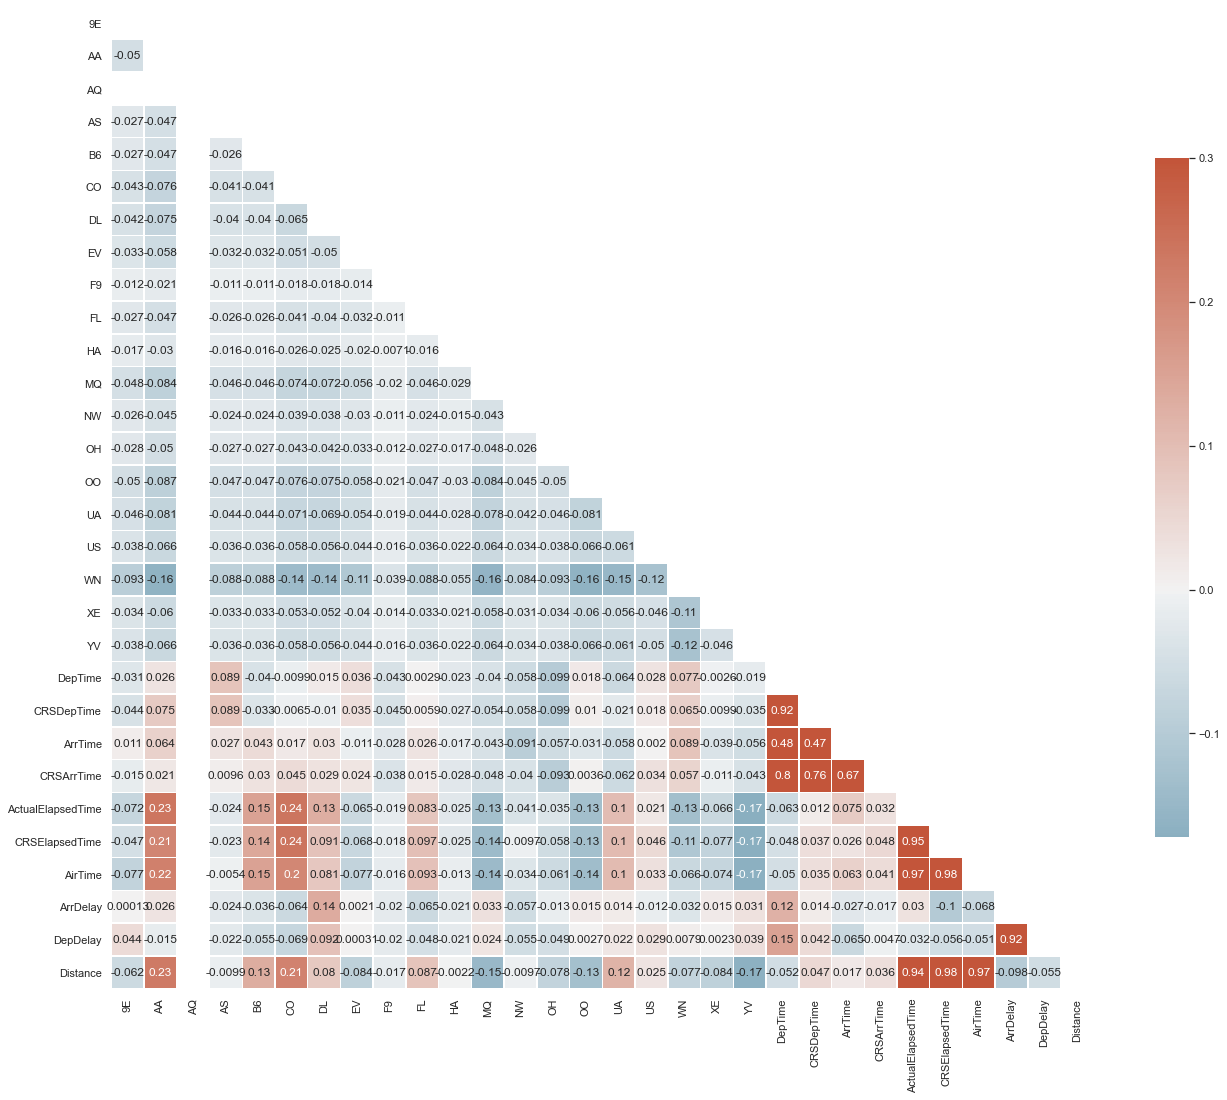

In [60]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = samplind_fligths.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

Se puede observar que la mayoria de las variables que eran categoricas (convertidas en dummy) no tienen mucha relacion con otras variables. Con excepcion de la relacion entre la distancia y el tiempo de vuelo con el UniqueCarrier.

### Standirized numeric variables
Ahora, enfocamos el analisis en la correlacion entre las variables numericas:

<AxesSubplot:>

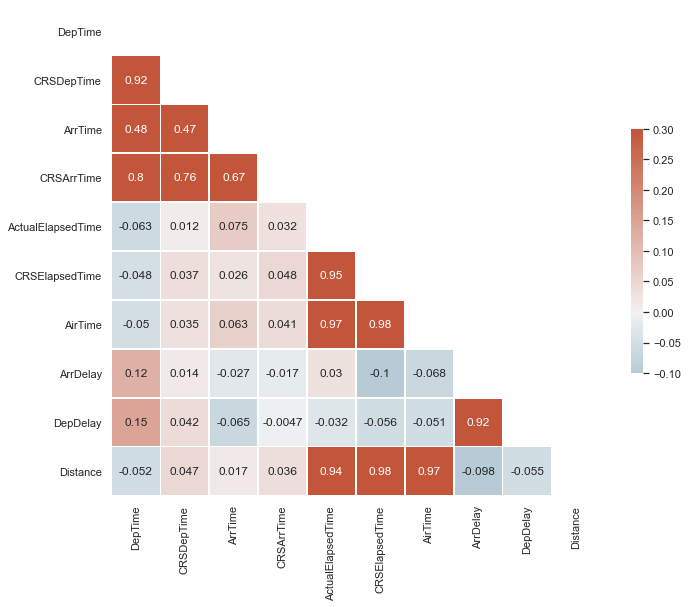

In [42]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = samplind_fligths[numeric_sd].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

Se puede observar que las variables ActualElapsedTime, CRSElapsedTime y Airtime tienen mayor correlacion con la Distancia recorrida. Asimismo, las variables ArrDelay tiene una alta correlacion con DepDelay, algo que puede resultar una asociacion obvia. Las variables CRRSDepTime, ArrTime y CRRSArrTime tienen tambien una alta correlacion con sus contrapartes en DepTime.

### Dummy variables analysis

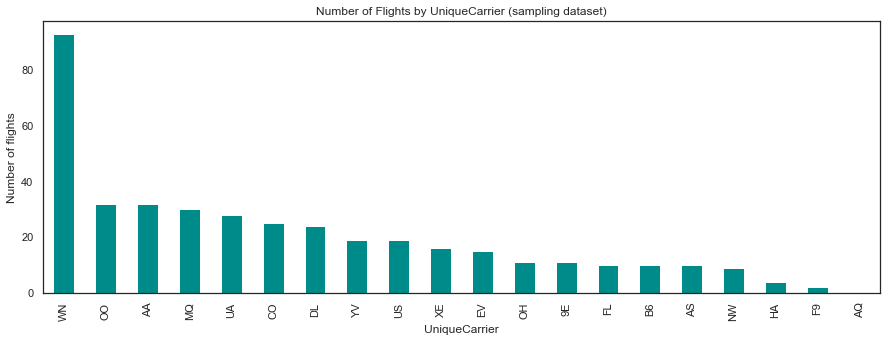

In [63]:
# Data 
labels = ['9E', 'AA', 'AQ', 'AS', 'B6', 'CO', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ', 'NW', 'OH', 'OO', 'UA', 'US', 'WN', 'XE', 'YV']

# Plot
fig,ax  = plt.subplots(figsize = (15,5))
samplind_fligths[labels].sum().sort_values(ascending=False).plot(kind='bar', color='#008B8B')
plt.ylabel('Number of flights')
plt.xlabel('UniqueCarrier')
plt.title('Number of Flights by UniqueCarrier (sampling dataset)')
plt.show()

#### Resumen del cuaderno: 
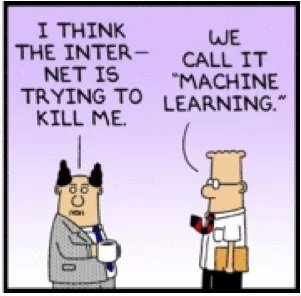